# Introduction to Regression with Neural Networks in TensorFlow

There are many definitions for a regression problem but in our case, we're going to simplify it: predicting a numerical variable based on some other combination of variables, even shorter... predicting a number.

In [ ]:
# Import Tensorflow
import tensorflow as tf
print(tf.__version__)

2.18.0


## Creating data to view and fit

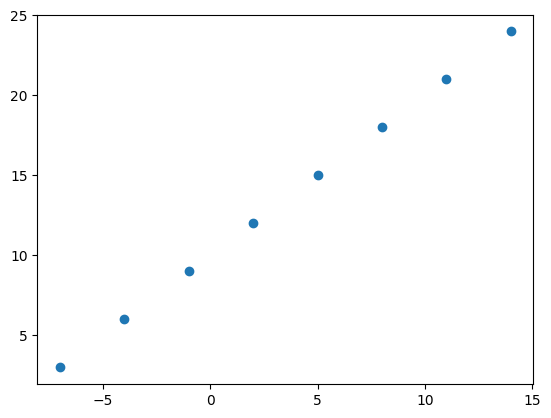

In [ ]:
import numpy as np
import matplotlib as plt

# Create features
X  = np.array([-7.0,-4.0,-1.0,2.0,5.0,8.0,11.0,14.0])

# Create labels
y = np.array([3.0,6.0,9.0,12.0,15.0,18.0,21.0,24.0])

# Visualize it
plt.pyplot.scatter(X,y)

## Input and output shapes

In [ ]:
# Create a demo tensor for our housing price prediction problem
house_info = tf.constant(["bedroom","bathroom","garage"])
house_price = tf.constant([939700])
house_info,house_price

(<tf.Tensor: shape=(3,), dtype=string, numpy=array([b'bedroom', b'bathroom', b'garage'], dtype=object)>,
 <tf.Tensor: shape=(1,), dtype=int32, numpy=array([939700], dtype=int32)>)

In [ ]:
input_shape = X[0].shape
output_shape = y[0].shape
input_shape, output_shape

((), ())

In [ ]:
X[0].ndim

0

In [ ]:
X[0], y[0]

(-7.0, 3.0)

In [ ]:
# Turn our NumPy arrays into tensors with dtype float32
X = tf.cast(tf.constant(X), dtype=tf.float32)
y = tf.cast(tf.constant(y), dtype=tf.float32)
X, y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [ ]:
input_shape = X[0].shape
output_shape = y[0].shape
input_shape, output_shape

(TensorShape([]), TensorShape([]))

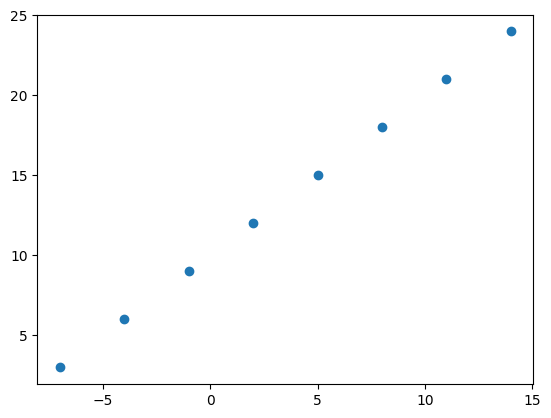

In [ ]:
plt.pyplot.scatter(X,y)

## Steps in modeling with TensorFlow

1. **Creating a model** - define the input and output layers, as well as the hidden layers of a deep learning model.
2. **Compiling a model** - define the loss function (in other words, the function which tells our model how wrong it is) and the optimizer (tells our model how to improve the patterns its learning) and evaluation metrics (what we can use to interpret the performance of our model).
3. **Fitting a model** - letting the model try to find patterns between X & y (features and labels)

In [ ]:
# Dersten ayrı ekledim çünkü belliki tensorflow sadece 2 boyutlu verilerde çalışmaya başlamış.
X= tf.expand_dims(X, axis=-1)
y= tf.expand_dims(y, axis=-1)
X,y

(<tf.Tensor: shape=(8, 1), dtype=float32, numpy=
 array([[-7.],
        [-4.],
        [-1.],
        [ 2.],
        [ 5.],
        [ 8.],
        [11.],
        [14.]], dtype=float32)>,
 <tf.Tensor: shape=(8, 1), dtype=float32, numpy=
 array([[ 3.],
        [ 6.],
        [ 9.],
        [12.],
        [15.],
        [18.],
        [21.],
        [24.]], dtype=float32)>)

In [ ]:
# Set random seed
tf.random.set_seed(42)

# 1. Create a model using the Sequential API
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model.compile(loss=tf.keras.losses.mae, # mae is short for mean absolute error
              optimizer =tf.keras.optimizers.SGD(), # sgd is short for stochastic gradient descent
              metrics = ["mae"])

# 3. Fit the model
model.fit(X,y, epochs=5)

Epoch 1/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 523ms/step - loss: 12.0319 - mae: 12.0319
Epoch 2/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step - loss: 11.8994 - mae: 11.8994
Epoch 3/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step - loss: 11.7669 - mae: 11.7669
Epoch 4/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 131ms/step - loss: 11.6344 - mae: 11.6344
Epoch 5/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 130ms/step - loss: 11.5019 - mae: 11.5019


In [ ]:
# Check out X and y
X,y

(<tf.Tensor: shape=(8, 1), dtype=float32, numpy=
 array([[-7.],
        [-4.],
        [-1.],
        [ 2.],
        [ 5.],
        [ 8.],
        [11.],
        [14.]], dtype=float32)>,
 <tf.Tensor: shape=(8, 1), dtype=float32, numpy=
 array([[ 3.],
        [ 6.],
        [ 9.],
        [12.],
        [15.],
        [18.],
        [21.],
        [24.]], dtype=float32)>)

In [ ]:
# Try and make a prediction using our model
y_pred = model.predict(tf.convert_to_tensor([[17.0]]))
y_pred

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step


array([[10.155954]], dtype=float32)

## Improving our model

We can improve our model, by altering the steps we took to create a model.

1. **Creating a model** - here we might add more layers, increase the number of hidden units (all called neurons) within each of the hidden layers, change the activation function of each layer.
2. **Compiling a mode** - here we might change the optimization function or perhaps the **learning rate** of the optimization function.
3. **Fitting a model** - here we might fit a model for more **epochs**(leave it training for longer) or on more data(give the model more examples to learn from).

In [ ]:
# Let's rebuild our model
# 1. Create the model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"])

# 3. Fit the model (this time we'll train for longer)
model.fit(X,y,epochs=100)

Epoch 1/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 529ms/step - loss: 17.4328 - mae: 17.4328
Epoch 2/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - loss: 17.1516 - mae: 17.1516
Epoch 3/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - loss: 16.8703 - mae: 16.8703
Epoch 4/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - loss: 16.5891 - mae: 16.5891
Epoch 5/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step - loss: 16.3078 - mae: 16.3078
Epoch 6/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - loss: 16.0266 - mae: 16.0266
Epoch 7/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step - loss: 15.7453 - mae: 15.7453
Epoch 8/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step - loss: 15.4641 - mae: 15.4641
Epoch 9/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 131ms/step - loss: 15.1828 - mae: 15.1828
Epoch 10/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 14.9016 - mae: 14.9016
Epoch 11/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - loss: 14.7094 - mae: 14.7094
Epoch 12/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 14.5769 - mae: 14.5769
Epoch 13/100
1/1 ━━━━━━

In [ ]:
# Remind ourselves of the data
X, y

(<tf.Tensor: shape=(8, 1), dtype=float32, numpy=
 array([[-7.],
        [-4.],
        [-1.],
        [ 2.],
        [ 5.],
        [ 8.],
        [11.],
        [14.]], dtype=float32)>,
 <tf.Tensor: shape=(8, 1), dtype=float32, numpy=
 array([[ 3.],
        [ 6.],
        [ 9.],
        [12.],
        [15.],
        [18.],
        [21.],
        [24.]], dtype=float32)>)

In [ ]:
# Let's see if our model's prediction has improved...)
model.predict(tf.convert_to_tensor([[17.0]]))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step


array([[29.764069]], dtype=float32)

In [ ]:
# Let's see if we can make another change to improve our model

# 1. Create the model (this time with an extra hidden layers with 100 hidden units)
model = tf.keras.Sequential([
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"])
# 3. Fit the model
model.fit(X,y, epochs=100)

Epoch 1/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 623ms/step - loss: 13.0320 - mae: 13.0320
Epoch 2/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step - loss: 12.5109 - mae: 12.5109
Epoch 3/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - loss: 11.9849 - mae: 11.9849
Epoch 4/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - loss: 11.4437 - mae: 11.4437
Epoch 5/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - loss: 10.8900 - mae: 10.8900
Epoch 6/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - loss: 10.3124 - mae: 10.3124
Epoch 7/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 9.7006 - mae: 9.7006
Epoch 8/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step - loss: 9.0532 - mae: 9.0532
Epoch 9/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - loss: 8.3656 - mae: 8.3656
Epoch 10/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - loss: 7.6392 - mae: 7.6392
Epoch 11/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - loss: 6.8619 - mae: 6.8619
Epoch 12/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - loss: 6.0245 - mae: 6.0245
Epoch 13/100
1/1 ━━━━━━━━━━━━━━━━━━

In [ ]:
# Let's remind ourselves of the data
X,y

(<tf.Tensor: shape=(8, 1), dtype=float32, numpy=
 array([[-7.],
        [-4.],
        [-1.],
        [ 2.],
        [ 5.],
        [ 8.],
        [11.],
        [14.]], dtype=float32)>,
 <tf.Tensor: shape=(8, 1), dtype=float32, numpy=
 array([[ 3.],
        [ 6.],
        [ 9.],
        [12.],
        [15.],
        [18.],
        [21.],
        [24.]], dtype=float32)>)

In [ ]:
# Let's try to make a prediction
model.predict(tf.convert_to_tensor([[17.0]]))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step


array([[32.75973]], dtype=float32)

In [ ]:
# Let's see if we can make another change to improve our model

# 1. Create the model (this time with an extra hidden layers with 100 hidden units)
model = tf.keras.Sequential([
    tf.keras.layers.Dense(50, activation=None),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
              metrics=["mae"])
# 3. Fit the model
model.fit(X,y, epochs=100)

Epoch 1/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 13.7557 - mae: 13.7557
Epoch 2/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step - loss: 13.0821 - mae: 13.0821
Epoch 3/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 136ms/step - loss: 12.4029 - mae: 12.4029
Epoch 4/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step - loss: 11.7144 - mae: 11.7144
Epoch 5/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step - loss: 11.0147 - mae: 11.0147
Epoch 6/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 135ms/step - loss: 10.3020 - mae: 10.3020
Epoch 7/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step - loss: 9.5747 - mae: 9.5747
Epoch 8/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 147ms/step - loss: 8.8308 - mae: 8.8308
Epoch 9/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step - loss: 8.0682 - mae: 8.0682
Epoch 10/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step - loss: 7.2844 - mae: 7.2844
Epoch 11/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 142ms/step - loss: 6.6420 - mae: 6.6420
Epoch 12/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 139ms/step - loss: 6.7165 - mae: 6.7165
Epoch 13/100
1/1 ━━━━━━━━━━━━━━━━━

In [ ]:
# Let's try to make a prediction
model.predict(tf.convert_to_tensor([[17.0]]))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step


array([[26.425804]], dtype=float32)

## Evaluating a model

In practice, a typical workflow you'll go through when building neural networks is:



```
Build a model -> fit it -> evaluate it -> tweak a model -> fit it -> evaulate it -> tweak a model -> fit it -> evaluate it...
```



When it comes to evaluation... There are 3 words you should memorize:

>"Visualize, visualize, visualize"

It's good idea to visualize:
* The data - what data are we working with? What does it look like
* The model itself - what does our model look like
* The training of a model - how does a model perform while it learns?
* The predictions of the model - how do the predictions of a model line up against the ground truth(the original labels)=

In [ ]:
# Make a bigger dataset
X = tf.range(-100,100, 4)
X

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
        -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
        -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
         32,   36,   40,   44,   48,   52,   56,   60,   64,   68,   72,
         76,   80,   84,   88,   92,   96], dtype=int32)>

In [ ]:
# Make labels for the datasets
y = X + 10
len(y)

50

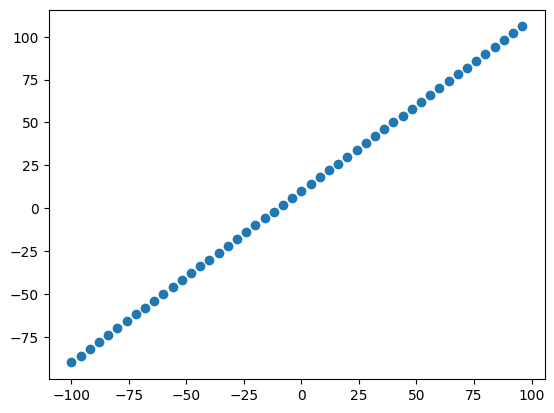

In [ ]:
# Visualize the data
import matplotlib.pyplot as plt
plt.scatter(X,y)

### The 3 sets...

* **Training set** - the model learns from this data, which is typically 70-80% of the total data you have available.
* **Validation set** - the model gets tuned on this data, which is typically 10-15% of the data available.
* **Test set** - the model gets evaluated on this data to test what it has learned, this set is typically 10-15% of the total data available.



In [ ]:
# Check the length of how many samples we have
len(X)

50

In [ ]:
# Split the data into train and test sets
X_train = X[:40] # first 40 are training samples (80% of the data)
X_train = tf.expand_dims(X_train, axis=-1)
y_train = y[:40]
y_train = tf.expand_dims(y_train, axis=-1)

X_test = X[40:] # last 10 are testing samples (20% of the data)
X_test = tf.expand_dims(X_test, axis=-1)
y_test = y[40:]
y_test = tf.expand_dims(y_test, axis=-1)

len(X_train), len(y_train), len(X_test), len(y_test)

(40, 40, 10, 10)

### Visualizing the data

Now we've got our data in training and test sets... let's visualize it again!

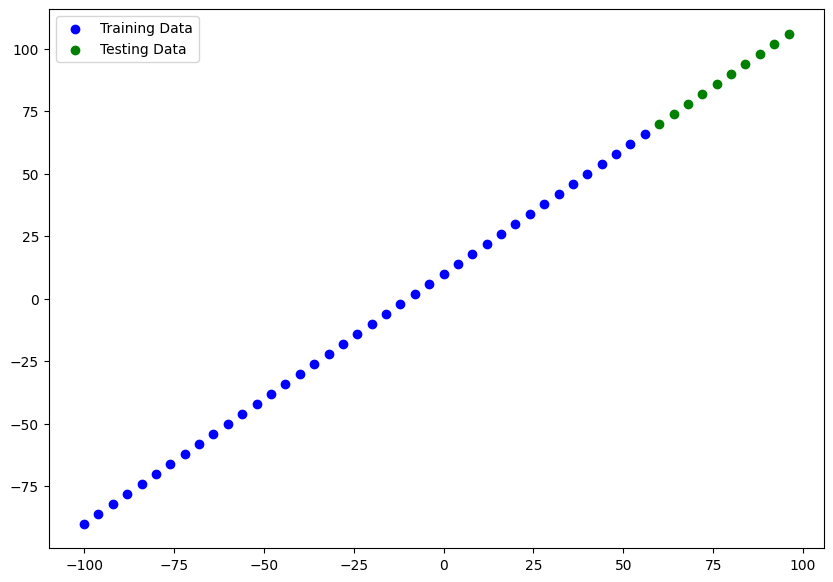

In [ ]:
plt.figure(figsize=(10,7))
#Plot training data in blue
plt.scatter(X_train, y_train, c="b", label="Training Data")
#Plot test data in green
plt.scatter(X_test,y_test, c="g", label="Testing Data")
#Show a legend
plt.legend();

In [ ]:
# Let's have a look at how to build a neural network for our data

# 1. Create a model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"])

# 3. Fit the model
model.fit(X_train,y_train,epochs=100)

Epoch 1/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 36.2906 - mae: 36.2906 
Epoch 2/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 8.7735 - mae: 8.7735
Epoch 3/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 8.6402 - mae: 8.6402
Epoch 4/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 8.4083 - mae: 8.4083
Epoch 5/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 9.1507 - mae: 9.1507
Epoch 6/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 8.2228 - mae: 8.2228
Epoch 7/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 8.8898 - mae: 8.8898
Epoch 8/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 7.8104 - mae: 7.8104
Epoch 9/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 10.8209 - mae: 10.8209
Epoch 10/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 7.7468 - mae: 7.7468
Epoch 11/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 10.6103 - mae: 10.6103
Epoch 12/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 7.4921 - mae: 7.4921
Epoch 13/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2

### Visualizing the model

In [ ]:
# Le's create a model which builds automatically by defining the input_shape arguments
tf.random.set_seed(42)

# 1.Create a model (same as above)
model = tf.keras.Sequential([
    tf.keras.layers.Dense(50,input_shape=[1], name="input_layer"),
    tf.keras.layers.Dense(1, name="output_layer")
], name = "model1")
# 2. Compile the model
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"])


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.summary()

Model: "model1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (Dense)                  │ (None, 50)                  │             100 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ output_layer (Dense)                 │ (None, 1)                   │              51 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 151 (604.00 B)

 Trainable params: 151 (604.00 B)

 Non-trainable params: 0 (0.00 B)

* Total params - total number of paramaters in the model.
* Trainable parameters - these are the parameters (patterns) the model can update as it trains.
* Non-trainable params - these parameters aren't updated during training (this is typical when you bring in already learn patterns or parameters from other models during **transfer learning**).


📖 **Resource:** For a more in-depth overview of the trainable parameters within a layer, check out MIT's introduction to deep learning video.

In [ ]:
# Let's our model to the training data
model.fit(X_train,y_train,epochs=100, verbose=0)

In [ ]:
# Get a summary of our model
model.summary()

Model: "model1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (Dense)                  │ (None, 50)                  │             100 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ output_layer (Dense)                 │ (None, 1)                   │              51 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 153 (616.00 B)

 Trainable params: 151 (604.00 B)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

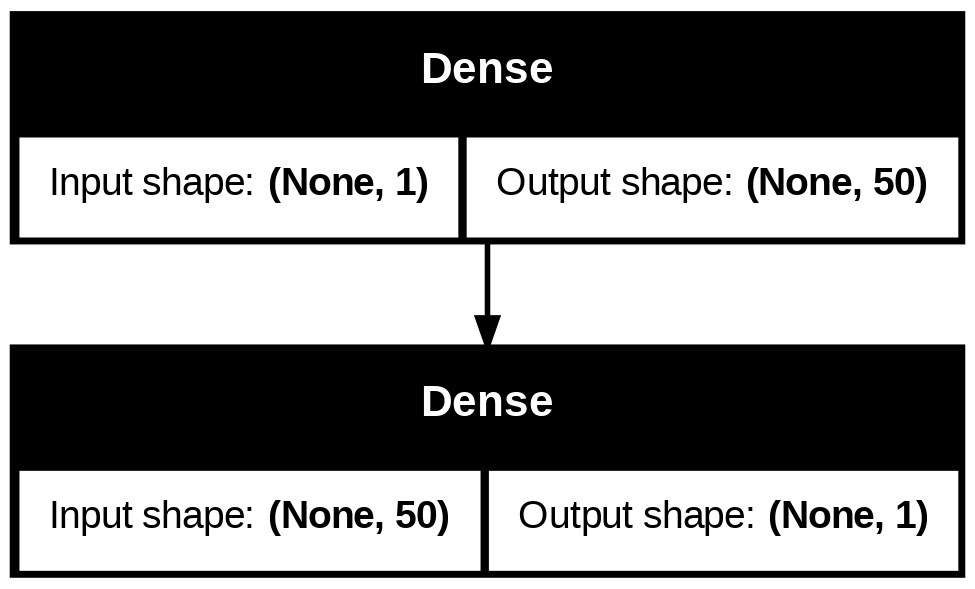

In [ ]:
from tensorflow.keras.utils import plot_model

plot_model(model=model,show_shapes=True)

### Visualizing our model's predictions

To visualize predictions, it's a good idea to plot them against the ground truth labels.

Often you'll see this in the form of `y_test` or `y_pred`(ground truth versus your model predictions)

In [ ]:
# Make some predictions
y_pred = model.predict(X_test)
y_pred

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step


array([[42.907352],
       [45.657795],
       [48.40824 ],
       [51.158688],
       [53.90913 ],
       [56.659573],
       [59.41002 ],
       [62.160465],
       [64.91091 ],
       [67.661354]], dtype=float32)

🔑 **Note:** If you feel like you're going to reuse some of functionality in the future, it's a good idea to turn it into a function.

In [ ]:
# Let's create a plotting function
def plot_predictions(train_data=X_train,
                     train_labels=y_train,
                     test_data=X_test,
                     test_labels=y_test,
                     predictions=y_pred):
  """
  Plots training data, test data and compares predictions to ground truth labels.
  """
  plt.figure(figsize=(10,7))
  #Plot training data in blue
  plt.scatter(train_data, train_labels, c="b", label="Training data")
  # Plot testing data in green
  plt.scatter(test_data, test_labels, c="g", label="Testing data")
  #Plot model's predictions
  plt.scatter(test_data, predictions, c="r", label="Predictions")
  #Show the legend
  plt.legend();

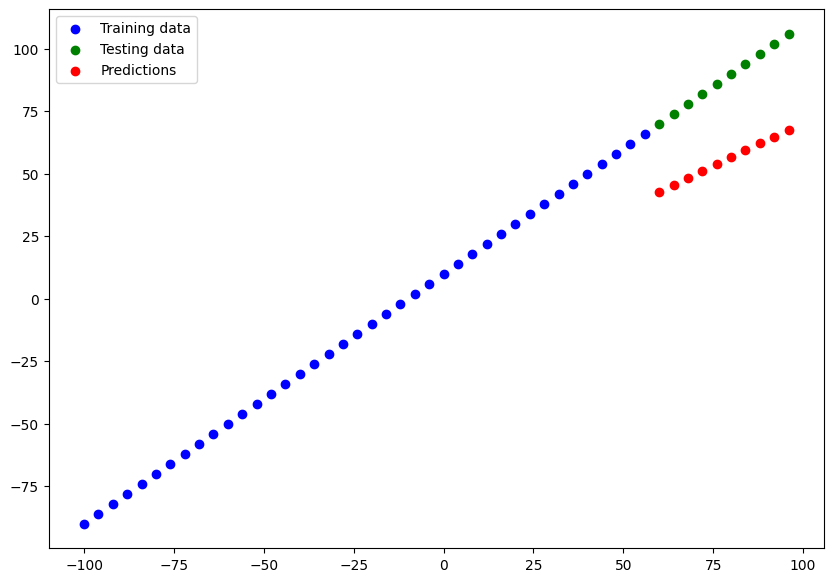

In [ ]:
plot_predictions(train_data=X_train,
                 train_labels=y_train,
                 test_data=X_test,
                 test_labels=y_test,
                 predictions=y_pred)

### Evaluating our model's predictions with regression evaluation metrics

Depending on the problem you're working on, there will be different evaluation metrics to evaluate your model's performance.

Since we're working on a regression, two of the main metrics:
* MAE - mean absolute error, "on average, how wrong is each of my model's predictions"
* MSE - mean squeare error, "square the average errors"

In [ ]:
# Evaluate the model on the test
model.evaluate(X_test, y_test)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step - loss: 29.2420 - mae: 29.2420


[29.242040634155273, 29.242040634155273]

In [ ]:
type(y_pred[-1])

numpy.ndarray

In [ ]:
len(y_test), y_test

(10,
 <tf.Tensor: shape=(10, 1), dtype=int32, numpy=
 array([[ 70],
        [ 74],
        [ 78],
        [ 82],
        [ 86],
        [ 90],
        [ 94],
        [ 98],
        [102],
        [106]], dtype=int32)>)

In [ ]:
a=tf.constant()

In [ ]:
# Calculate the mean absolute error
def mae(y_test,y_pred):
  toplam=0
  for i in range(len(y_test)):
    a = abs(y_test[i].numpy()-y_pred[i]) # tahmin ile test verisi arasındaki fark
    toplam += a
    return toplam/len(y_test)

In [ ]:
# Calculate the mean square error
def mse(y_test,y_pred):
  toplam=0
  for i in range(len(y_test)):
    a = np.square(y_test[i].numpy()-y_pred[i]) # tahmin ile test verisi arasındaki fark
    toplam += a
    return toplam/len(y_test)


### Running experiments to improve our model


```
Build a model -> fit it -> evaluate it -> tweak it -> fit it -> evaluate it -> tweak it -> fit it -> evaluate it...
```

Let's do 3 modelling experiments:

1. `model_1` - same as the orijinal model, 1 layer, trained for 100 epochs
2. `model_2 `- 2 layers, trained for 100 epochs
3. `model_3` - 2 layer, trained for 500 epochs



**Build `model_1`**

In [ ]:
# Set random seed
tf.random.set_seed(42)

# 1. Create a model
model_1 = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# 2. Compile the moel
model_1.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.SGD(),
                metrics=["mae"])
# 3. Fit the model
model.fit(X_train,y_train, epochs=100)

Epoch 1/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - loss: 3.2592 - mae: 3.2592 
Epoch 2/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 12.2108 - mae: 12.2108
Epoch 3/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 12.3162 - mae: 12.3162
Epoch 4/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 16.2480 - mae: 16.2480
Epoch 5/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 18.8333 - mae: 18.8333
Epoch 6/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 14.3331 - mae: 14.3331 
Epoch 7/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 17.8849 - mae: 17.8849
Epoch 8/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 20.7722 - mae: 20.7722
Epoch 9/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 26.6973 - mae: 26.6973
Epoch 10/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 3.9706 - mae: 3.9706
Epoch 11/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 15.7393 - mae: 15.7393
Epoch 12/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 19.0802 - mae: 19.0802
Epoch 13/100
2/2 ━━━━━━━━━━

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step


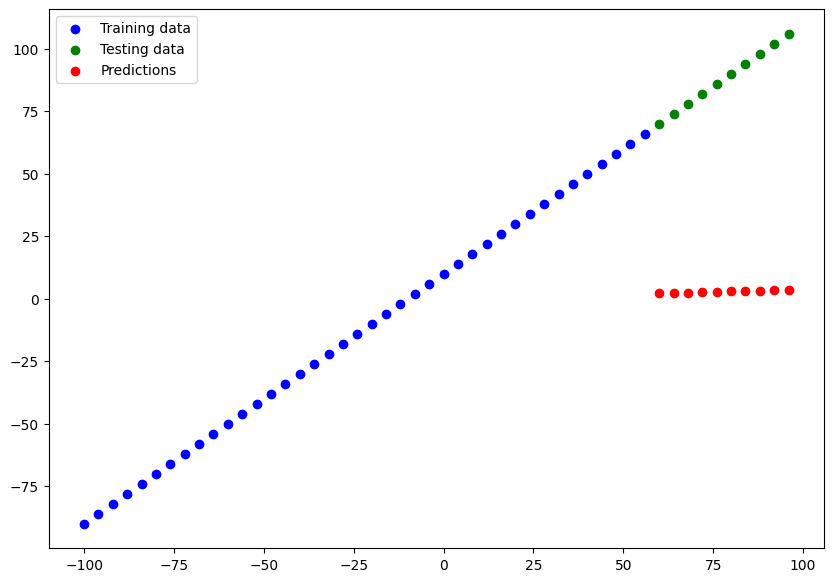

In [ ]:
# Make and plot predictions with model_1
y_preds_1 = model_1.predict(X_test)
plot_predictions(predictions=y_preds_1)

In [ ]:
# Calculate model_1 evaluation metrics
mae_1 = mae(y_test, y_preds_1)
mse_1 = mse(y_test, y_preds_1)
mae_1,mse_1

(array([6.78065753]), array([459.77316537]))

**Build `model_2`**

* 2 dense layers, trained for 100 epochs

In [ ]:
# Set the random seed
tf.random.set_seed(42)

# 1. Create a model
model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model_2.compile(
    loss=tf.keras.losses.mae,
    optimizer=tf.keras.optimizers.SGD(),
    metrics=["mse"])

# 3. Fit the model
model_2.fit(X_train,y_train,epochs=100)

Epoch 1/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 44ms/step - loss: 12.1577 - mse: 260.7390
Epoch 2/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - loss: 22.6875 - mse: 800.6901
Epoch 3/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 8.3350 - mse: 104.8264
Epoch 4/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 19.5311 - mse: 537.5420
Epoch 5/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 20.5595 - mse: 568.4560
Epoch 6/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 13.2847 - mse: 275.6384
Epoch 7/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 18.5999 - mse: 461.7320
Epoch 8/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 13.5331 - mse: 271.3254
Epoch 9/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 14.8459 - mse: 307.1581
Epoch 10/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 15.6963 - mse: 333.1624
Epoch 11/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 11.7875 - mse: 214.1840
Epoch 12/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 14.7683 - mse: 301.6591
Epoch 13/100
2

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step


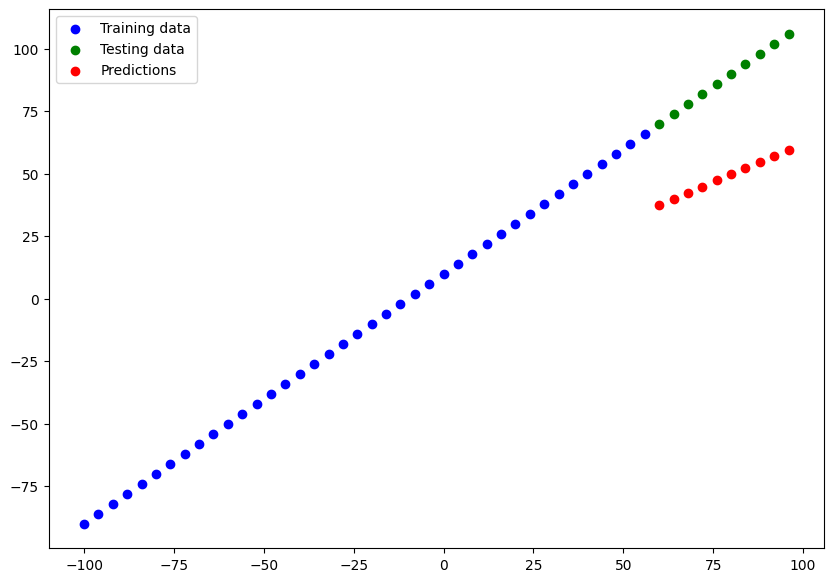

In [ ]:
# Make and plot predictions of model_2
y_preds_2 = model_2.predict(X_test)
plot_predictions(predictions=y_preds_2)

In [ ]:
# Calculate model_2 evaluation metrics
mae_2 = mae(y_test,y_preds_2)
mse_2 = mse(y_test,y_preds_2)
mae_2,mse_2

(array([3.23070831]), array([104.37476204]))

** Build `model_3`**

* 2 layers, trained for 500 epochs


In [ ]:
# Set random seed
tf.random.set_seed(42)

# 1. Create a model
model_3=tf.keras.Sequential([
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model_3.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.SGD(),
                metrics=["mse"])

# 3. Fit the model
model.fit(X_train,y_train,epochs=500)

Epoch 1/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 18.3732 - mae: 18.3732
Epoch 2/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 21.4578 - mae: 21.4578
Epoch 3/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 28.7779 - mae: 28.7779
Epoch 4/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 2.5134 - mae: 2.5134
Epoch 5/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 11.5574 - mae: 11.5574
Epoch 6/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 12.5903 - mae: 12.5903
Epoch 7/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 16.4730 - mae: 16.4730
Epoch 8/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 19.8366 - mae: 19.8366
Epoch 9/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 29.3979 - mae: 29.3979
Epoch 10/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 3.3947 - mae: 3.3947
Epoch 11/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 6.7310 - mae: 6.7310 
Epoch 12/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 12.1392 - mae: 12.1392
Epoch 13/500
2/2 ━━━━━━━━━━━━━

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step


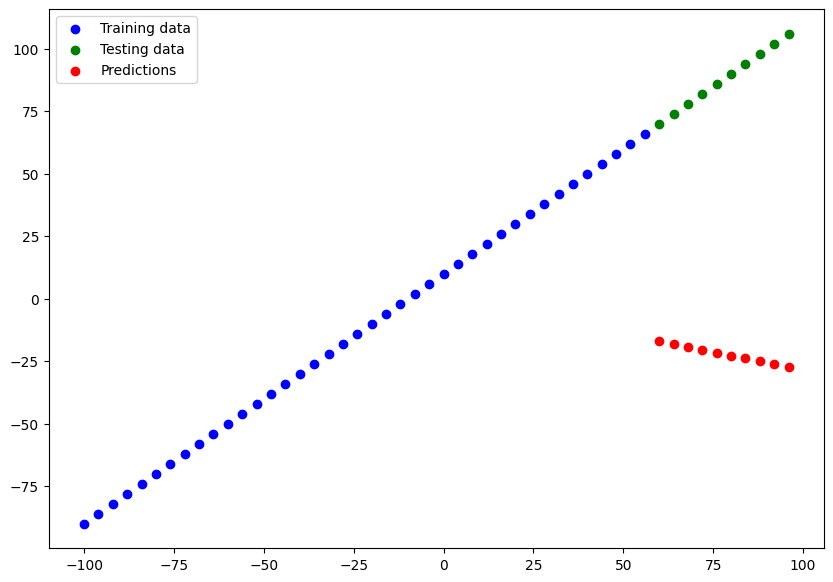

In [ ]:
# Make and plot predictions
y_preds_3 = model_3.predict(X_test)
plot_predictions(predictions=y_preds_3)

In [ ]:
mae_3 = mae(y_test, y_preds_3)
mse_3 = mse(y_test, y_preds_3)
mae_3,mse_3

(array([8.7056776]), array([757.88822557]))

🔑 **Note:** You want to start with small experiments(small models) and make sure they work and then increase their scale when necessary.

## Comparing the results of our experiments

We've run a few experiments, let's compare the results

In [ ]:
# Let's compare model's results using a pandas DataFrame
import pandas as pd

model_results = [["model_1", mae_1,mse_1],
                 ["model_2", mae_2,mse_2],
                 ["model_3", mae_3,mse_3]]

all_results = pd.DataFrame(model_results, columns=["model","mae","mse"])
all_results

,model,mae,mse
0,model_1,[6.780657529830933],[459.77316536852925]
1,model_2,[3.2307083129882814],[104.37476203611587]
2,model_3,[8.705677604675293],[757.8882255654495]


Looks like `model_2` performed the best...

In [ ]:
model_2.summary()

Model: "sequential_12"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_16 (Dense)                     │ (None, 10)                  │              20 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_17 (Dense)                     │ (None, 1)                   │              11 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 33 (136.00 B)

 Trainable params: 31 (124.00 B)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

🔑 **Note:** One of your main goals should be to minimize the time between your experiments. The more experiments you do, the more things you will figure out which don't work and in turn, get closer to figuring out what does work. Remember the machine learning practioner's motto: "experiment, experiment, experiment".

## Tracking your experiments

One really good habit in machine learning modelling is to track the results of your experiments.

And when doing so, it can be tedious if you're running lots of experiments.


📖 **Resource:** As you build more models, you'll want to look into using:

* TensorBoard - a component of the TensorFlow library to help track modelling experiments (we'll see this one later).
* Weights & Biases - a tool for tracking all of kinds of machine learning experiments (plugs straight into TensorBoard)

## Saving our models

Saving our models allows us to use them outside of Google Colab(or wherever they were trained) such as in a web application or a mobile app

1. The SavedModel format
2. The HDF5 format

In [ ]:
# Save model using the SavedModel format
model_2.save("best_model_SavedModel_format.keras")

In [ ]:
# Save model using the HDF5 format
model_2.save("best_model_HDF5_format.h5")

## Loading in a saved model





In [ ]:
# Load in the SavedModel format model
loaded_SavedModel_format = tf.keras.models.load_model("/content/best_model_SavedModel_format.keras")
loaded_SavedModel_format.summary()

Model: "sequential_12"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_16 (Dense)                     │ (None, 10)                  │              20 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_17 (Dense)                     │ (None, 1)                   │              11 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 33 (136.00 B)

 Trainable params: 31 (124.00 B)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

In [ ]:
# Compare model_2 predictions with SavedModel format model predictions
model_2_preds = model_2.predict(X_test)
loaded_SavedModel_format_preds = loaded_SavedModel_format.predict(X_test)
model_2_preds == loaded_SavedModel_format_preds

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 388ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 169ms/step


array([[ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True]])

In [ ]:
# Load in a model using the .h5 format
loaded_h5_model = tf.keras.models.load_model("/content/best_model_HDF5_format.h5")
loaded_h5_model.summary()

Model: "sequential_12"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_16 (Dense)                     │ (None, 10)                  │              20 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_17 (Dense)                     │ (None, 1)                   │              11 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 33 (136.00 B)

 Trainable params: 31 (124.00 B)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

In [ ]:
# Check to see if loaded .h5 model predictions match model_2
loaded_h5_preds = loaded_h5_model.predict(X_test)
model_2_preds == loaded_h5_preds

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 166ms/step


array([[ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True]])

## Download a model (or any other file) from Google Colab

If you want to download your files from Google Colab:
1. You can go to the "files" tab and right click on the file you're after and click "download".
2. Use code(see the cell below
3. Save it to Google Driver by connecting Google Drive and copying it there (see 2'nd code cell below)

In [ ]:
# Download a file from Google Colab
from google.colab import files
files.download("/content/best_model_HDF5_format.h5")

In [ ]:
# Save a file from Google Colab to Google Drive (requires mounting Google Drive)
!cp /content/best_model_HDF5_format.h5 /content/drive/MyDrive
# !cp = copy

## A larger example

In [1]:
# Import required libraries
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Read in the insurance dataset
insurance = pd.read_csv("https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/refs/heads/master/insurance.csv")
insurance

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [3]:
insurance["sex"]

,sex
0,female
1,male
2,male
3,male
4,male
...,...
1333,male
1334,female
1335,female
1336,female


In [4]:
# Let's try one-hot encode our DataFrame so it's all numbers
insurance_one_hot = pd.get_dummies(insurance)
insurance_one_hot.head()

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,True,False,False,True,False,False,False,True
1,18,33.770,1,1725.55230,False,True,True,False,False,False,True,False
2,28,33.000,3,4449.46200,False,True,True,False,False,False,True,False
3,33,22.705,0,21984.47061,False,True,True,False,False,True,False,False
4,32,28.880,0,3866.85520,False,True,True,False,False,True,False,False


In [5]:
# Create X & y values (features and labels)
X = insurance_one_hot.drop("charges",axis=1)
y = insurance_one_hot["charges"]

In [6]:
# View X
X.head()

,age,bmi,children,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,True,False,False,True,False,False,False,True
1,18,33.770,1,False,True,True,False,False,False,True,False
2,28,33.000,3,False,True,True,False,False,False,True,False
3,33,22.705,0,False,True,True,False,False,True,False,False
4,32,28.880,0,False,True,True,False,False,True,False,False


In [7]:
# View y
y.head()

,charges
0,16884.92400
1,1725.55230
2,4449.46200
3,21984.47061
4,3866.85520


In [8]:
# Create training and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)
len(X), len(X_train), len(X_test)

(1338, 1070, 268)

In [9]:
# Build a neural network (sort of like model_2 above)
tf.random.set_seed(42)

# 1. Create a model
insurance_model = tf.keras.Sequential([
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
insurance_model.compile(loss=tf.keras.losses.mae,
                        optimizer=tf.keras.optimizers.SGD(),
                        metrics=["mae"])

# 3. Fit the model
insurance_model.fit(X_train, y_train, epochs=100)


Epoch 1/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 10161.9600 - mae: 10161.9600
Epoch 2/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 7625.0234 - mae: 7625.0234
Epoch 3/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 7353.1162 - mae: 7353.1162
Epoch 4/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 7318.4800 - mae: 7318.4800
Epoch 5/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 7837.1470 - mae: 7837.1470
Epoch 6/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 7736.6890 - mae: 7736.6890
Epoch 7/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - loss: 7665.8667 - mae: 7665.8667
Epoch 8/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 7639.2295 - mae: 7639.2295
Epoch 9/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 7669.5063 - mae: 7669.5063
Epoch 10/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 7544.0171 - mae: 7544.0171
Epoch 11/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 7306.0176 - mae: 7306.0176
Epoch 12/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/st

In [10]:
# Check the results of the insurance model on the test data
insurance_model.evaluate(X_test, y_test)

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 8039.0117 - mae: 8039.0117  


[8004.63037109375, 8004.63037109375]

In [11]:
y_train.median(), y_train.mean()

(9575.4421, 13346.089736364485)

Right now it looks like our model isn't performing too well... let's try and improve it!

To (try) improve our model, we'll run 2 experiments:
1. Add an extra layer with more hidden units and use the Adam optimizer
2. Same as above but Train for longer(200 epochs)
3. (insert your own experiment here)

In [12]:
# Set random seed
tf.random.set_seed(42)

# 1. Create a model
insurance_model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
insurance_model_2.compile(
    loss=tf.keras.losses.mae,
    optimizer=tf.keras.optimizers.Adam(),
    metrics=["mae"]
)

# 3. Fit the model
insurance_model_2.fit(X_train, y_train, epochs=100, verbose=1)

Epoch 1/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - loss: 13252.8125 - mae: 13252.8125
Epoch 2/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 13110.4551 - mae: 13110.4551
Epoch 3/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 12818.7178 - mae: 12818.7178
Epoch 4/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 12238.2461 - mae: 12238.2461
Epoch 5/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 11230.8447 - mae: 11230.8447
Epoch 6/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 9843.3008 - mae: 9843.3008  
Epoch 7/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 8425.9756 - mae: 8425.9756
Epoch 8/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 7558.2715 - mae: 7558.2715
Epoch 9/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 7394.5889 - mae: 7394.5889
Epoch 10/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 7365.3315 - mae: 7365.3315
Epoch 11/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 7344.5586 - mae: 7344.5586
Epoch 12/100
34/34 ━━━━━━━━━━━━━━━━━━━━

In [13]:
#Evaluate the larger model
insurance_model_2.evaluate(X_test, y_test)

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 5127.7559 - mae: 5127.7559  


[4972.9912109375, 4972.9912109375]

In [14]:
# Set Random Seed
tf.random.set_seed(42)

# 1. Create a model
insurance_model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
  ])
# 2. Compile the model
insurance_model_3.compile(loss=tf.keras.losses.mae,
                          optimizer=tf.keras.optimizers.Adam(),
                          metrics=["mae"])

# 3. Fit the model
history = insurance_model_3.fit(X_train, y_train, epochs=200)

Epoch 1/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 13276.4941 - mae: 13276.4941
Epoch 2/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 13079.9561 - mae: 13079.9561
Epoch 3/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 12711.0918 - mae: 12711.0918
Epoch 4/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 12005.2676 - mae: 12005.2676
Epoch 5/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 10845.7090 - mae: 10845.7090
Epoch 6/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 9394.4756 - mae: 9394.4756
Epoch 7/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 8090.0186 - mae: 8090.0186
Epoch 8/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 7491.4585 - mae: 7491.4585
Epoch 9/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 7404.1504 - mae: 7404.1504
Epoch 10/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 7378.7520 - mae: 7378.7520
Epoch 11/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 7356.4141 - mae: 7356.4141
Epoch 12/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s

In [15]:
# Evaluate our third model
insurance_model_3.evaluate(X_test, y_test)

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 3457.9121 - mae: 3457.9121  


[3392.7734375, 3392.7734375]

In [16]:
insurance_model.evaluate(X_test, y_test)

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 8039.0117 - mae: 8039.0117 


[8004.63037109375, 8004.63037109375]

Text(0.5, 0, 'epochs')

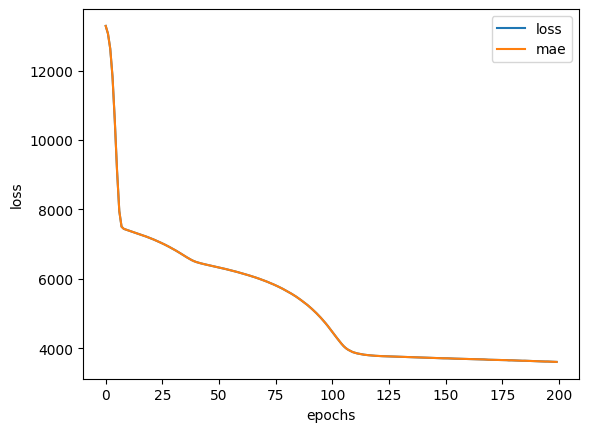

In [17]:
# Plot history (also known as a loss curve or a training curve)
pd.DataFrame(history.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs")

❓ **Question:** How long should you train for ?

It depends. Really... It depends on the problem you're working on. However, many people have asked this question before... So TensorFlow has a solution! It's called the [EarlyStopping Callback](https://www.tensorflow.org/api_docs/python/tf/keras/callbacks/EarlyStopping), which is a TensorFlow component you can add to your model to stop training once it stops improving certain metric.

## Prepocessing data(normalization and standardization)

In terms of scaling values, neural networks tend to prefer normalization.

If you're not sure on which to use, you could try both and see which performs better.

In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

# Read in the insurance dataset
insurance = pd.read_csv("https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/refs/heads/master/insurance.csv")
insurance

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


To prepare our date, we can borrow a few classes from Scikit-Learn

In [23]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.model_selection import train_test_split
# Create a columns transformer
ct = make_column_transformer(
    (MinMaxScaler(), ["age", "bmi","children"]), # Turn all values in this columns between 0 and 1
    (OneHotEncoder(handle_unknown="ignore"), ["sex","smoker", "region"])
)

# Create X & y
X = insurance.drop("charges",axis=1)
y = insurance["charges"]

# Build our train and test sets

X_train, X_test, y_train, t_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit the columns transformer to our trainin data
ct.fit(X_train)

# Transform training and test date with normalization (MinMaxScaler) and OneHotEncoder
X_train_normal = ct.transform(X_train)
X_test_normal = ct.transform(X_test)



In [24]:
# What does our data look like now?
X_train.loc[0]

,0
age,19
sex,female
bmi,27.9
children,0
smoker,yes
region,southwest


In [25]:
X_train_normal[0]

array([0.60869565, 0.10734463, 0.4       , 1.        , 0.        ,
       1.        , 0.        , 0.        , 1.        , 0.        ,
       0.        ])

In [26]:
X_train.shape, X_train_normal.shape

((1070, 6), (1070, 11))

Beatiful! Our data has been normalized and one hot encoded.
Now let's build a neural network model on it and see how it goes

In [27]:
# Build a neural network model to fit on our normalized data
tf.random.set_seed(42)

# 1. Create a model
insurance_model_4 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
insurance_model_4.compile(loss=tf.keras.losses.mae,
                          optimizer=tf.keras.optimizers.Adam(),
                          metrics=["mae"])

# 3. Fit the model
insurance_model_4.fit(X_train_normal,y_train, epochs=100)

Epoch 1/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 13298.2852 - mae: 13298.2852
Epoch 2/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 13291.9199 - mae: 13291.9199
Epoch 3/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 13275.1416 - mae: 13275.1416
Epoch 4/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 13236.6982 - mae: 13236.6982
Epoch 5/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 13165.2461 - mae: 13165.2461
Epoch 6/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 13049.7842 - mae: 13049.7842
Epoch 7/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 12879.6621 - mae: 12879.6621
Epoch 8/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 12644.4150 - mae: 12644.4150
Epoch 9/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 12334.1650 - mae: 12334.1650
Epoch 10/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 11941.7578 - mae: 11941.7578
Epoch 11/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 11474.7871 - mae: 11474.7871
Epoch 12/100
34/34 ━━━━━━━━━━━

In [28]:
# Evaluate our insurance model trained on normalized data
insurance_model_4.evaluate(X_test_normal, y_test)

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 3516.2935 - mae: 3516.2935  


[3430.556884765625, 3430.556884765625]

In [ ]:
#9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 5127.7559 - mae: 5127.7559
#[4972.9912109375, 4972.9912109375]